<a href="https://colab.research.google.com/github/sgulyano/CMKL41-685/blob/main/41_685lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CMKL41-685 Computer Vision Lab 2

CMKL University

By Sarun Gulyanon


### Goal

Introduce students to the basic image processing techniques like geometric transformation, filtering, and image processing in frequency domain.

### Outline

In this lab, students will explore three fundamental concepts of image processing:

1. Geometric Transformation: how to manipulate the geometry of an image.
2. Filtering: how to manipulate the pixel values of an image.
3. Image Processing in Frequency Domain: the use of the Fourier Transform to analyze images

### References
- OpenCV: https://docs.opencv.org/5.x/d9/df8/tutorial_root.html


----

## 1. Geometric Transformation

Geometric Transformation are operations that change the spatial relationship of pixels in an image.

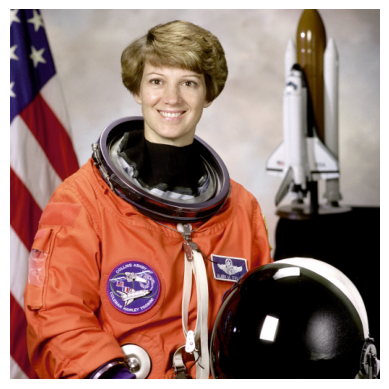

In [1]:
import cv2
import numpy as np
from skimage import data
import matplotlib.pyplot as plt
%matplotlib inline


#@title Select Image {run: 'auto'}
image_name = 'astronaut' #@param ['astronaut', 'camera', 'cat', 'coffee', 'checkerboard', 'page']

image = getattr(data, image_name)()

if image.ndim < 3:
    plt.imshow(image, cmap='gray')
else:
    plt.imshow(image)
plt.axis('off')
plt.show()


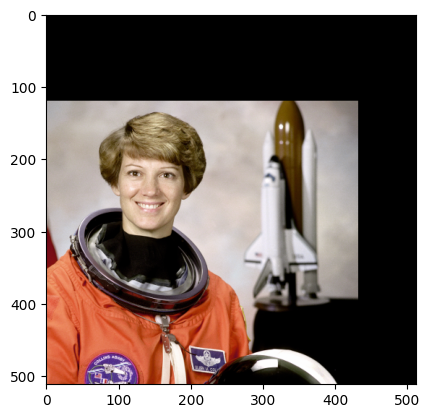

In [2]:
#@title Translation {run: 'auto'}
X = -80 #@param {type:"slider", min:-200, max:200, step:10}
Y = 120 #@param {type:"slider", min:-200, max:200, step:10}

translation_matrix = np.array([
    [1, 0, X],
    [0, 1, Y],
    [0, 0, 1]
], dtype=np.float32)

dst = cv2.warpAffine(image, translation_matrix[:2], (image.shape[1], image.shape[0]))

if image.ndim < 3:
    plt.imshow(dst, cmap='gray')
else:
    plt.imshow(dst)
plt.show()

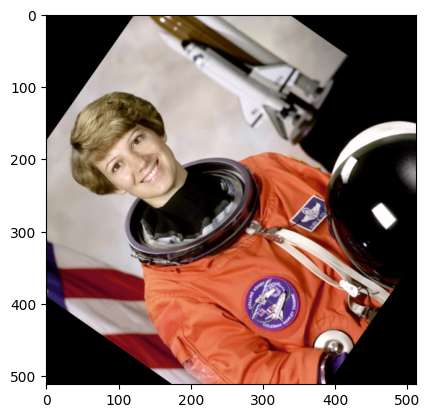

In [3]:
#@title Rotation {run: 'auto'}
angle = 55 #@param {type:"slider", min:0, max:360, step:5}

center = (image.shape[1]//2, image.shape[0]//2)
rotate_matrix = cv2.getRotationMatrix2D(center=center, angle=angle, scale=1)
rotate_matrix = np.concatenate((rotate_matrix, [[0, 0, 1]]), axis=0)

dst = cv2.warpAffine(image, rotate_matrix[:2], (image.shape[1], image.shape[0]))

if image.ndim < 3:
    plt.imshow(dst, cmap='gray')
else:
    plt.imshow(dst)
plt.show()

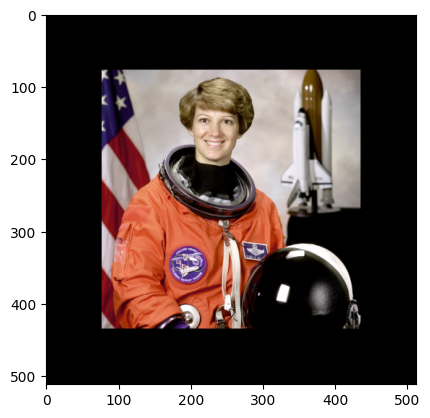

In [4]:
#@title Uniform Scaling {run: 'auto'}
scale = 0.7 #@param {type:"slider", min:0.5, max:2, step:0.1}

center = (image.shape[1]//2, image.shape[0]//2)
rotate_matrix = cv2.getRotationMatrix2D(center=center, angle=0, scale=scale)
rotate_matrix = np.concatenate((rotate_matrix, [[0, 0, 1]]), axis=0)

dst = cv2.warpAffine(image, rotate_matrix[:2], (image.shape[1], image.shape[0]))

if image.ndim < 3:
    plt.imshow(dst, cmap='gray')
else:
    plt.imshow(dst)
plt.show()

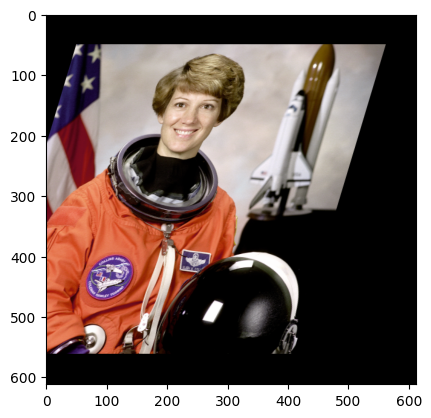

In [5]:
#@title Shearing {run: 'auto'}
sh_x = -0.3 #@param {type:"slider", min:-1, max:1, step:0.1}
sh_y = 0 #@param {type:"slider", min:-1, max:1, step:0.1}

shearing_matrix = np.array([
    [1, sh_x, 50],
    [sh_y, 1, 50],
    [0, 0, 1]
], dtype=np.float32)

dst = cv2.warpAffine(image, shearing_matrix[:2], (image.shape[1]+100, image.shape[0]+100))

if image.ndim < 3:
    plt.imshow(dst, cmap='gray')
else:
    plt.imshow(dst)
plt.show()

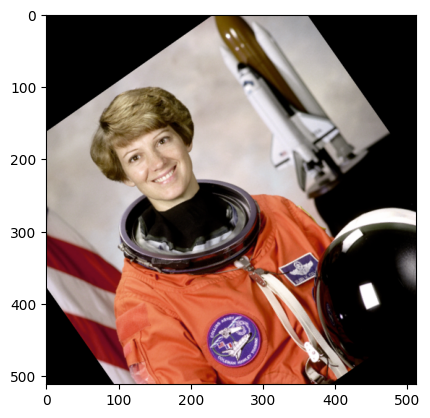

In [6]:
#@title Affine Transformation {run: 'auto'}
angle = 35 #@param {type:"slider", min:0, max:360, step:5}
scale = 1 #@param {type:"slider", min:0.5, max:2, step:0.1}
X = 0 #@param {type:"slider", min:-200, max:200, step:10}
Y = 40 #@param {type:"slider", min:-200, max:200, step:10}
sh_x = 0 #@param {type:"slider", min:-1, max:1, step:0.1}
sh_y = 0 #@param {type:"slider", min:-1, max:1, step:0.1}

center = (image.shape[1]//2, image.shape[0]//2)
rotate_matrix = cv2.getRotationMatrix2D(center=center, angle=angle, scale=scale)
rotate_matrix = np.concatenate((rotate_matrix, [[0, 0, 1]]), axis=0)

translation_matrix = np.array([
    [1, 0, X],
    [0, 1, Y],
    [0, 0, 1]
], dtype=np.float32)

shearing_matrix = np.array([
    [1, sh_x, 0],
    [sh_y, 1, 0],
    [0, 0, 1]
], dtype=np.float32)

aff_mat = translation_matrix @ rotate_matrix @ shearing_matrix

dst = cv2.warpAffine(image, aff_mat[:2], (image.shape[1], image.shape[0]))

if image.ndim < 3:
    plt.imshow(dst, cmap='gray')
else:
    plt.imshow(dst)
plt.show()

How to Compute an Affine Transformation from Point Correspondence

Affine Transformation Matrix:
 [[  1.26666667   0.6        -83.33333333]
 [ -0.33333333   1.          66.66666667]]


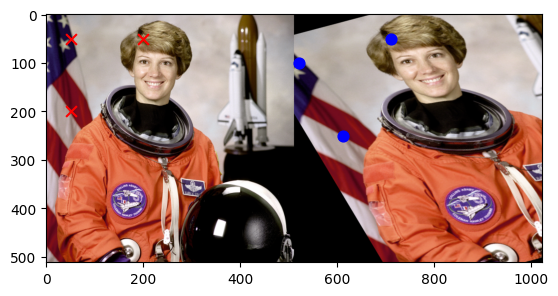

In [7]:
if image.ndim == 3:
    rows, cols, _ = image.shape
else:
    rows, cols = image.shape

# Define 3 points from the original image
pts1 = np.float32([[50, 50], [200, 50], [50, 200]])

# Define the corresponding points in the output image
pts2 = np.float32([[10, 100], [200, 50], [100, 250]])

# Compute affine transformation matrix
M = cv2.getAffineTransform(pts1, pts2)
print("Affine Transformation Matrix:\n", M)

# Apply the affine transformation
dst = cv2.warpAffine(image, M, (cols, rows))

# Show correspondence
img2 = np.concatenate((image, dst), axis=1)
plt.imshow(img2, cmap='gray')
plt.scatter(pts1[:,0], pts1[:,1], c="r", s=60, marker="x", label="Source Points")
plt.scatter(pts2[:,0]+cols, pts2[:,1], c="b", s=60, marker="o", label="Destination Points")

## 2. Filtering

Filtering are operations that modify or enhance an image by operating on its pixel values.

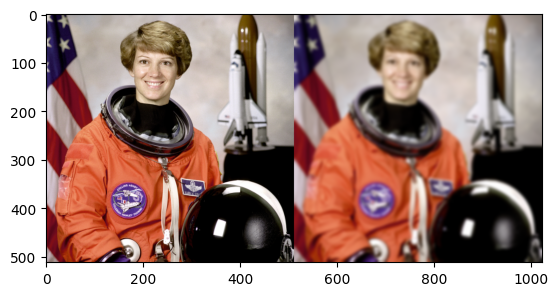

In [8]:
#@title Gaussian Blur {run: 'auto'}
kernel_size = 13 #@param {type:"slider", min:3, max:21, step:2}
sigma = 3 #@param {type:"slider", min:0.1, max:10, step:0.1}

dst = cv2.GaussianBlur(image, (kernel_size, kernel_size), sigma)

img2 = np.concatenate((image, dst), axis=1)
if image.ndim < 3:
    plt.imshow(img2, cmap='gray')
else:
    plt.imshow(img2)
plt.show()

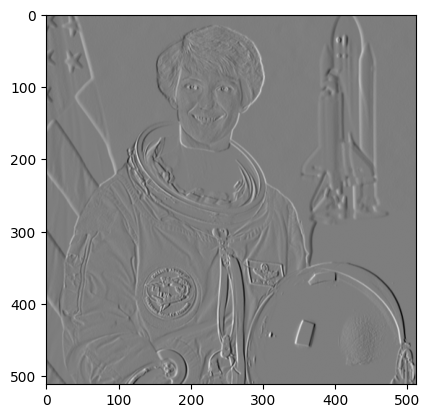

In [9]:
#@title Sorbel Operator {run: 'auto'}
grad_direction = 'X' #@param ['X', 'Y']

if image.ndim < 3:
    gray = image.copy()
else:
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
if grad_direction == 'X':
    dx, dy = 1, 0
else:
    dx, dy = 0, 1

grad = cv2.Sobel(gray, cv2.CV_16S, dx, dy, ksize=3)

plt.imshow(grad, cmap='gray')
plt.show()

# 3. Image Processing in Frequency Domain

We have worked with images in the spatial domain, where each pixel is processed directly. Another way to analyze and modify images is in the frequency domain, which we obtain using the Fourier Transform.

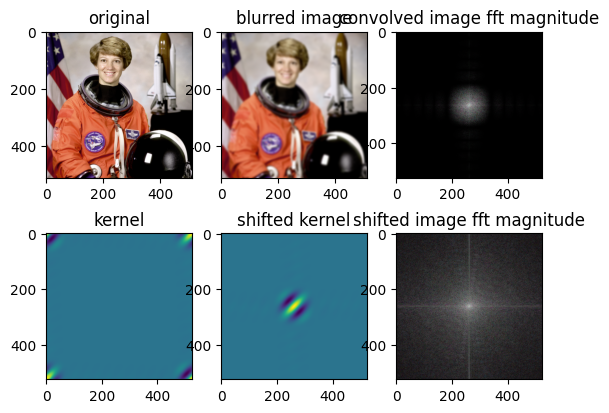

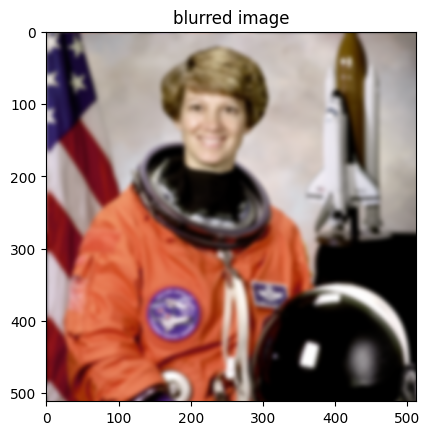

In [10]:
import matplotlib.pyplot as plt
import numpy as np

def gaussian_kernel(size, sigma=1):
    n = size//2
    xx, yy = np.meshgrid(range(-n,n+1), range(-n,n+1))
    kernel = np.exp(- (xx**2 + yy**2) / (2*sigma**2))
    kernel = kernel / kernel.sum()
    return kernel


def gaussian_blur_fft(image, kernel_size=5, sigma=1):
    """
    Perform Gaussian blur on the image using FFT
    Input:  image = the original image to perform Gaussian blur on
            kernel_size = size of the Gaussian kernel
            sigma = sigma of the Gaussian function
    Output: Image after applied the Gaussian blur using FFT
            Gaussian kernel in the frequency domain
            Image in the frequency domain
            Convolved image in the frequency domain
    """
    kernel = gaussian_kernel(kernel_size, sigma)

    kernel_row, kernel_col = kernel.shape

    pad_height = kernel_row // 2
    pad_width = kernel_col // 2

    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width), (0, 0)), 'edge')

    kernel_fft = np.fft.fft2(kernel, s=padded_image.shape[:2], axes=(0, 1))

    image_fft = np.fft.fft2(padded_image, axes=(0, 1))

    convolved_fft = kernel_fft[:, :, np.newaxis] * image_fft
    convolved_image = np.fft.ifft2(convolved_fft, axes=(0, 1)).real
    convolved_image = np.clip(convolved_image, 0, 1)
    return convolved_image[pad_height:-pad_height, pad_width:-pad_width], kernel_fft, image_fft, convolved_fft

kernel_size = 13
sigma = 3

if image.ndim == 2:
    img = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR) / 255
else:
    img = image.copy() / 255

img_blur, kernel_fft, image_fft, convolved_fft = gaussian_blur_fft(img, kernel_size, sigma)

image_fft_shift = np.log( abs(np.fft.fftshift(image_fft).real) + 1 )
kernel_fft_shift = np.fft.fftshift(kernel_fft)
convolved_fft_shift = np.log( abs(np.fft.fftshift(convolved_fft).real) + 1 )

plt.figure()
plt.subplot(2,3,1)
plt.imshow(img)
plt.title('original')
plt.subplot(2,3,2)
plt.imshow(img_blur)
plt.title('blurred image')

plt.subplot(2,3,4)
plt.imshow(kernel_fft.real)
plt.title('kernel')
plt.subplot(2,3,5)
plt.imshow(kernel_fft_shift.real)
plt.title('shifted kernel')
plt.subplot(2,3,6)
plt.imshow(image_fft_shift / image_fft_shift.max())
plt.title('shifted image fft magnitude')
plt.subplot(2,3,3)
plt.imshow(convolved_fft_shift / convolved_fft_shift.max())
plt.title('convolved image fft magnitude')
plt.show()

plt.figure()
plt.imshow(img_blur)
plt.title('blurred image')
plt.show()

----